In [ ]:
import pandas as pd
import numpy as np
from random import choices
import matplotlib.pyplot as plt

### 4.3.8 Regression Models in Practice:  Calculating High-Yield Betas to Stocks and Bonds

In this coding example we show how the OLS regression formula for the coefficient estimates detailed in can be implemented in Python to obtain the coefficients in a multe-variate linear regression model:

In [ ]:
Xs = np.concatenate((np.full((100, 1), 1), np.random.rand(100, 10)), axis=1)
Ys = np.random.rand(100, 1)

# OLS betas
betas = np.linalg.inv(Xs.T @ Xs) @ Xs.T @ Ys
print(betas)

[[ 0.69722347]
 [-0.05668251]
 [-0.03784933]
 [-0.00235999]
 [ 0.16042301]
 [-0.17510721]
 [-0.12624798]
 [-0.00490253]
 [-0.05519332]
 [-0.02286823]
 [-0.01518991]]


### 4.6.4 Portfolio Concepts in Practice: Benefit of Diversification

In this coding example we detail how to leverage the formulas in the previous section to calculate the return and volatility of a portfolio in Python:

In [ ]:
def portfolioStats(expectedReturnVector, weightsVector, covarianceMatrix):
    """
    expectedReturnVector & weightsVector: np arrays of vector columns
    covarianceMatrix: 2D symmetric np array
    """
    portfolioExpRet = expectedReturnVector.T@weightsVector
    portfolioVol = np.sqrt(weightsVector.T @ covarianceMatrix @ weightsVector)
    return portfolioExpRet[0,0], portfolioVol[0,0]

In [ ]:
expected_returns = np.array([[0.03], [0.05], [0.01]])

# define the weights for the portfolio (e.g. 40% in asset 1, 30% in asset 2, 30% in asset 3)
weights = np.array([[0.4], [0.3], [0.3]])

# define the covariance matrix for the 3 assets
cov_matrix = np.array([
    [0.001, 0.005, 0.002],
    [0.005, 0.012, 0.007],
    [0.002, 0.007, 0.010]
])

# calculate the portfolio stats
portfolio_return, portfolio_volatility = portfolioStats(expected_returns, weights, cov_matrix)

print(f"Portfolio Expected Return: {portfolio_return:.2%}")
print(f"Portfolio Volatility: {portfolio_volatility:.4f}")

Portfolio Expected Return: 3.00%
Portfolio Volatility: 0.0713


### 4.7 BOOTSTRAPPING

In the following coding example, we detail how to implement a simple bootstrapping algorithm in Python:

In [ ]:
def bootstrapSyntheticReturns(historicalReturns, numberOfPaths, pathLength):

    nAssets = 1
    if (len(historicalReturns.shape) > 1):
        nAssets = historicalReturns.shape[1]

    paths = np.zeros((pathLength, nAssets,numberOfPaths))
    for path in range(numberOfPaths):
        dateIdcs = choices(range(1, len(historicalReturns)), k = pathLength) #with replacement
        paths[:, :, path] = historicalReturns[dateIdcs, :]

    return paths

(30, 3, 10)


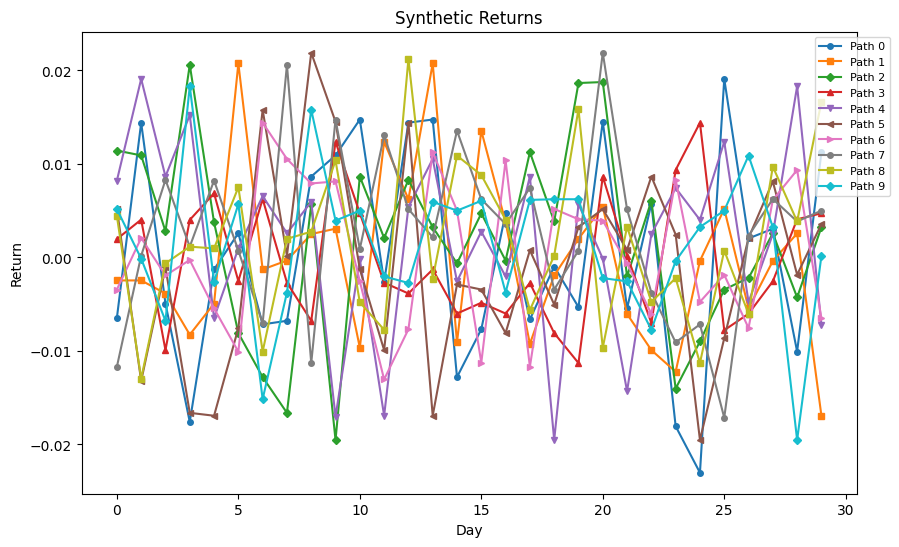

In [ ]:
# generate some historical returns data (e.g. daily returns for 1 year)
np.random.seed(42)
historical_returns = np.random.normal(loc=0, scale=0.01, size=(252, 3))  # 252 days, 3 assets

# set the number of paths and path length for the bootstrap
num_paths = 10
path_length = 30    # e.g. 30 days

# generate the synthetic returns using bootstrap
synthetic_returns = bootstrapSyntheticReturns(historical_returns, num_paths, path_length)

# print the shape of the resulting synthetic returns array
print(synthetic_returns.shape)

# plot the synthetic returns for the first asset
plt.figure(figsize=(10, 6))
markers = ['o', 's', 'D', '^', 'v', '<', '>']
labels = [f'Path {i}' for i in range(num_paths)]
for i in range(num_paths):
    plt.plot(synthetic_returns[:, 0, i], marker=markers[i%len(markers)], markersize=4, linestyle='-', label=labels[i])
plt.title("Synthetic Returns")
plt.xlabel("Day")
plt.ylabel("Return")
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.show()